# Demo

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 110
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
import muse_inference
from muse_inference import MuseProblem
import numpy as np

In [3]:
θ_true = 1.

## With numpy

### Scalar

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = prob.solve(0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▉         | 90/1010 [00:00<00:01, 897.79it/s]

 18%|█▊        | 180/1010 [00:00<00:00, 869.24it/s]

 27%|██▋       | 271/1010 [00:00<00:00, 885.38it/s]

 36%|███▌      | 365/1010 [00:00<00:00, 905.20it/s]

 46%|████▌     | 460/1010 [00:00<00:00, 918.01it/s]

 55%|█████▌    | 556/1010 [00:00<00:00, 929.71it/s]

 65%|██████▍   | 653/1010 [00:00<00:00, 940.78it/s]

 74%|███████▍  | 748/1010 [00:00<00:00, 943.55it/s]

 83%|████████▎ | 843/1010 [00:00<00:00, 945.40it/s]

100%|██████████| 1010/1010 [00:00<00:00, 1030.82it/s]

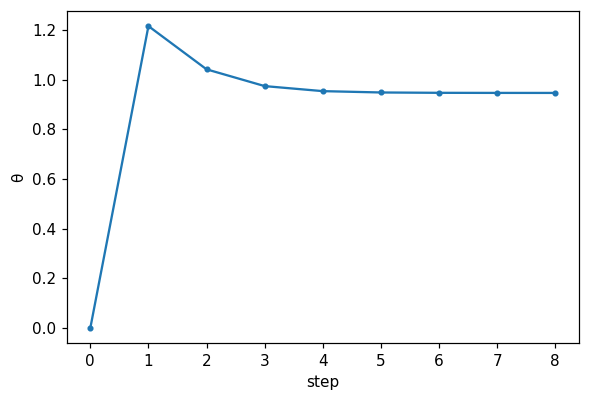

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [8]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        (θ1, θ2) = θ
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ((x1,x2), (z1,z2))
    
    def gradθ_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        return (np.sum(z1**2)/(2*np.exp(θ1)) - self.N/2, np.sum(z2**2)/(2*np.exp(θ2)) - self.N/2)
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        logLike = -(np.sum((x1 - z1)**2) + np.sum(z1**2) / np.exp(θ1) + 512*θ1) / 2 -(np.sum((x2 - z2)**2) + np.sum(z2**2) / np.exp(θ2) + 512*θ2) / 2
        gradz_logLike = (x1 - z1 * (1 + np.exp(-θ1)), x2 - z2 * (1 + np.exp(-θ2)))
        return (logLike, gradz_logLike)
    
    def gradθ_and_hessθ_logPrior(self, θ):
        (θ1, θ2) = θ
        g = (-θ1/(3**2), -θ2/(3**2))
        H = ((-1/3**2, 0),
              (0,      -1/3**2))
        return g, H

In [9]:
prob = NumpyFunnelMuseProblem(2048)
θ = (-1., 5.)
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [10]:
result = prob.solve(θ, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  1%|          | 9/1010 [00:00<00:11, 85.77it/s]

  3%|▎         | 26/1010 [00:00<00:07, 131.00it/s]

  4%|▍         | 42/1010 [00:00<00:06, 143.49it/s]

  6%|▌         | 58/1010 [00:00<00:06, 149.40it/s]

  7%|▋         | 73/1010 [00:00<00:07, 130.33it/s]

  9%|▉         | 89/1010 [00:00<00:06, 138.85it/s]

 10%|█         | 104/1010 [00:00<00:06, 133.11it/s]

 12%|█▏        | 122/1010 [00:00<00:06, 144.89it/s]

 14%|█▎        | 137/1010 [00:01<00:06, 133.35it/s]

 15%|█▌        | 155/1010 [00:01<00:05, 144.49it/s]

 17%|█▋        | 170/1010 [00:01<00:06, 132.77it/s]

 19%|█▊        | 188/1010 [00:01<00:05, 143.89it/s]

 20%|██        | 203/1010 [00:01<00:05, 140.19it/s]

 22%|██▏       | 218/1010 [00:01<00:05, 133.01it/s]

 23%|██▎       | 232/1010 [00:01<00:06, 126.73it/s]

 25%|██▍       | 251/1010 [00:01<00:05, 143.21it/s]

 27%|██▋       | 270/1010 [00:01<00:04, 155.45it/s]

 29%|██▊       | 290/1010 [00:02<00:04, 165.80it/s]

 30%|███       | 307/1010 [00:02<00:05, 140.25it/s]

 32%|███▏      | 327/1010 [00:02<00:04, 153.89it/s]

 34%|███▍      | 344/1010 [00:02<00:04, 144.35it/s]

 36%|███▌      | 364/1010 [00:02<00:04, 156.94it/s]

 38%|███▊      | 381/1010 [00:02<00:04, 146.30it/s]

 40%|███▉      | 399/1010 [00:02<00:04, 140.26it/s]

 41%|████      | 414/1010 [00:02<00:04, 139.87it/s]

 43%|████▎     | 433/1010 [00:03<00:03, 152.46it/s]

 45%|████▍     | 453/1010 [00:03<00:03, 163.33it/s]

 47%|████▋     | 470/1010 [00:03<00:03, 147.91it/s]

 49%|████▊     | 490/1010 [00:03<00:03, 159.42it/s]

 50%|█████     | 507/1010 [00:03<00:03, 155.52it/s]

 52%|█████▏    | 523/1010 [00:03<00:03, 144.85it/s]

 54%|█████▍    | 543/1010 [00:03<00:02, 158.06it/s]

 55%|█████▌    | 560/1010 [00:03<00:03, 146.69it/s]

 57%|█████▋    | 576/1010 [00:03<00:03, 138.51it/s]

 59%|█████▉    | 596/1010 [00:04<00:02, 153.00it/s]

 61%|██████    | 612/1010 [00:04<00:02, 150.48it/s]

 63%|██████▎   | 633/1010 [00:04<00:02, 146.27it/s]

 65%|██████▍   | 653/1010 [00:04<00:02, 159.67it/s]

 67%|██████▋   | 673/1010 [00:04<00:01, 169.61it/s]

 68%|██████▊   | 691/1010 [00:04<00:02, 154.44it/s]

 70%|███████   | 708/1010 [00:04<00:01, 152.59it/s]

 72%|███████▏  | 724/1010 [00:04<00:01, 143.51it/s]

 73%|███████▎  | 739/1010 [00:05<00:01, 136.83it/s]

 75%|███████▌  | 760/1010 [00:05<00:01, 154.27it/s]

 77%|███████▋  | 781/1010 [00:05<00:01, 167.11it/s]

 79%|███████▉  | 802/1010 [00:05<00:01, 177.29it/s]

 81%|████████▏ | 821/1010 [00:05<00:01, 150.77it/s]

 83%|████████▎ | 842/1010 [00:05<00:01, 164.42it/s]

 85%|████████▌ | 860/1010 [00:05<00:00, 153.24it/s]

 87%|████████▋ | 881/1010 [00:05<00:00, 165.60it/s]

 89%|████████▉ | 899/1010 [00:06<00:00, 154.37it/s]

 91%|█████████ | 916/1010 [00:06<00:00, 136.67it/s]

 93%|█████████▎| 937/1010 [00:06<00:00, 153.31it/s]

 95%|█████████▍| 958/1010 [00:06<00:00, 166.35it/s]

 97%|█████████▋| 976/1010 [00:06<00:00, 155.45it/s]

 99%|█████████▊| 997/1010 [00:06<00:00, 168.41it/s]

100%|██████████| 1010/1010 [00:06<00:00, 150.46it/s]

In [11]:
result.history[-1]["θ"]

(-1.0629377565878193, 4.9796990924522655)

## With Jax

In [12]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem, JaxMuseProblem

### Scalar

In [13]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (jnp.array(x), jnp.array(z))

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)

In [14]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [15]:
result = prob.solve(0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:01<33:08,  1.97s/it]

 10%|█         | 102/1010 [00:04<00:31, 28.41it/s]

 20%|██        | 203/1010 [00:04<00:13, 61.38it/s]

 40%|████      | 405/1010 [00:04<00:03, 152.11it/s]

 60%|██████    | 607/1010 [00:04<00:01, 260.62it/s]

 80%|████████  | 809/1010 [00:04<00:00, 384.22it/s]

100%|██████████| 1010/1010 [00:05<00:00, 201.23it/s]

In [16]:
[h["θ"] for h in result.history]

[0.0,
 DeviceArray(1.2127963, dtype=float32),
 DeviceArray(1.0396036, dtype=float32),
 DeviceArray(0.97261435, dtype=float32),
 DeviceArray(0.952539, dtype=float32),
 DeviceArray(0.94721234, dtype=float32),
 DeviceArray(0.94585395, dtype=float32),
 DeviceArray(0.94551116, dtype=float32),
 DeviceArray(0.94543195, dtype=float32)]

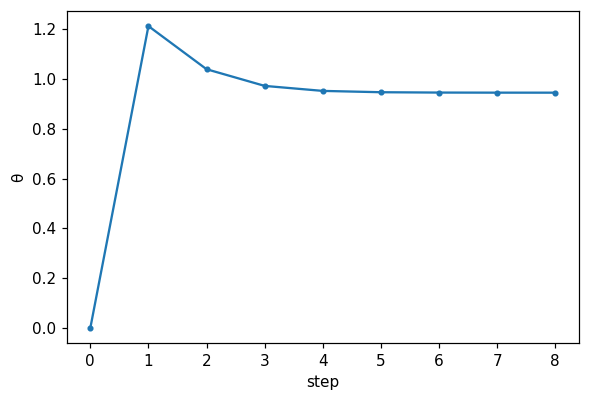

In [17]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [18]:
class JaxFunnelMuseProblem(muse_inference.jax.JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        (θ1, θ2) = (θ["θ1"], θ["θ2"])
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ({"x1":x1, "x2":x2}, {"z1":z1, "z2":z2})

    def logLike(self, x, z, θ):
        return (
            -(jnp.sum((x["x1"] - z["z1"])**2) + jnp.sum(z["z1"]**2) / jnp.exp(θ["θ1"]) + 512*θ["θ1"]) / 2
            -(jnp.sum((x["x2"] - z["z2"])**2) + jnp.sum(z["z2"]**2) / jnp.exp(θ["θ2"]) + 512*θ["θ2"]) / 2
        )
    
    def logPrior(self, θ):
        return -θ["θ1"]**2 / (2*3**2) - θ["θ2"]**2 / (2*3**2)

In [19]:
prob = JaxFunnelMuseProblem(512)
θ = {"θ1":1., "θ2":2.}
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [20]:
result = prob.solve(θ, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<40:42,  2.42s/it]

 10%|█         | 102/1010 [00:05<00:40, 22.32it/s]

 20%|██        | 203/1010 [00:05<00:16, 48.44it/s]

 34%|███▍      | 343/1010 [00:05<00:06, 100.65it/s]

 48%|████▊     | 485/1010 [00:05<00:03, 169.66it/s]

 60%|██████    | 607/1010 [00:05<00:01, 237.61it/s]

 75%|███████▌  | 759/1010 [00:06<00:00, 351.19it/s]

100%|██████████| 1010/1010 [00:06<00:00, 570.64it/s]

100%|██████████| 1010/1010 [00:06<00:00, 162.49it/s]

In [21]:
result.θ

{'θ1': DeviceArray(1.0922006, dtype=float32),
 'θ2': DeviceArray(1.9329985, dtype=float32)}

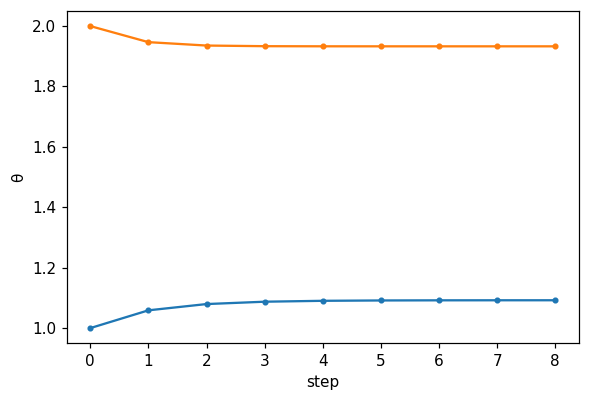

In [22]:
plt.plot([h["θ"]["θ1"] for h in result.history], ".-")
plt.plot([h["θ"]["θ2"] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [23]:
import sys
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

### Scalar

In [24]:
# define 
def gen_funnel(x=None, θ=None, rng_seeder=None):
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true, rng_seeder=rng)).prior.x[0,0]

# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [25]:
result = prob.solve(0., rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  8%|▊         | 77/1010 [00:00<00:01, 762.01it/s]

 15%|█▌        | 154/1010 [00:00<00:01, 462.32it/s]

 20%|██        | 207/1010 [00:00<00:02, 269.06it/s]

 30%|██▉       | 299/1010 [00:00<00:01, 404.97it/s]

 35%|███▌      | 357/1010 [00:00<00:01, 375.82it/s]

 40%|████      | 406/1010 [00:01<00:01, 347.99it/s]

 50%|████▉     | 500/1010 [00:01<00:01, 473.12it/s]

 55%|█████▌    | 559/1010 [00:01<00:01, 421.18it/s]

 60%|██████    | 610/1010 [00:01<00:01, 381.23it/s]

 70%|██████▉   | 703/1010 [00:01<00:00, 497.55it/s]

 75%|███████▌  | 762/1010 [00:01<00:00, 437.97it/s]

 80%|████████  | 813/1010 [00:02<00:00, 392.34it/s]

 90%|████████▉ | 907/1010 [00:02<00:00, 508.12it/s]

 96%|█████████▌| 967/1010 [00:02<00:00, 445.22it/s]

100%|██████████| 1010/1010 [00:02<00:00, 431.68it/s]

In [26]:
[h["θ"] for h in result.history]

[0.0,
 array([1.30363499]),
 array([1.14695937]),
 array([1.07392309]),
 array([1.02450847]),
 array([1.02850517]),
 array([1.02980893]),
 array([1.03023694]),
 array([1.03037775]),
 array([1.0304241])]

/home/runner/.cache/pypoetry/virtualenvs/muse-inference-8TQ0v75b-py3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


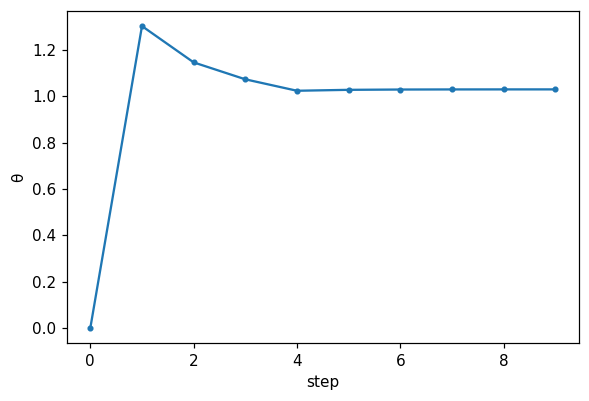

In [27]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [28]:
# define 
def gen_funnel(x=(None,None), θ=(None,None), rng_seeder=None, N=3):
    (α, β) = θ
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        α = pm.Normal("α", 0, 3) if α is None else α
        β = pm.Normal("β", 0, 3) if β is None else β
        z1 = pm.Normal("z1", 0, np.exp(α / 2), size=N)
        z2 = pm.Normal("z2", 0, np.exp(β / 2), size=N)
        x1 = pm.Normal("x1", z1, 1, observed=x[0])
        x2 = pm.Normal("x2", z2, 1, observed=x[1])
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
θ = (-1, 3)
prior = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ, rng_seeder=rng)).prior
x_obs = (prior.x1, prior.x2)

In [29]:
# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [30]:
result = prob.solve((0,0), α=0.3, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

 10%|█         | 102/1010 [00:00<00:03, 279.40it/s]

 20%|██        | 203/1010 [00:00<00:02, 271.14it/s]

 30%|███       | 304/1010 [00:01<00:02, 271.54it/s]

 40%|████      | 405/1010 [00:01<00:02, 272.89it/s]

 50%|█████     | 506/1010 [00:01<00:01, 273.56it/s]

 60%|██████    | 607/1010 [00:02<00:01, 273.68it/s]

 70%|███████   | 708/1010 [00:02<00:01, 278.10it/s]

 80%|████████  | 809/1010 [00:02<00:00, 279.45it/s]

 90%|█████████ | 910/1010 [00:03<00:00, 280.95it/s]

100%|██████████| 1010/1010 [00:03<00:00, 301.00it/s]

In [31]:
[h["θ"] for h in result.history]

[(0, 0),
 (-0.2815542650152186, 6.477243065481232),
 (-0.5141747017993881, 6.117638105986346),
 (-0.6918288059307816, 5.771206936941405),
 (-0.8177009896792248, 5.439946228160347),
 (-0.9018400316593392, 5.126349650147274),
 (-0.9572251933169915, 4.833422582078036),
 (-0.9973477714739579, 4.564419027380707),
 (-1.0313059723290432, 4.322361248178538),
 (-1.0403874945099805, 4.1095482019757394)]

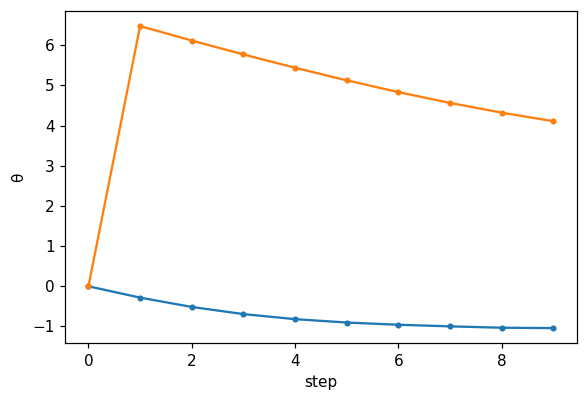

In [32]:
plt.plot([h["θ"][0] for h in result.history], ".-")
plt.plot([h["θ"][1] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");